<a href="https://colab.research.google.com/github/hemanth346/eva4/blob/master/S9/S9_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torchsummary

In [2]:
!git clone https://github.com/hemanth346/pytorch-wrapper.git || rm -r pytorch-wrapper && git clone https://github.com/hemanth346/pytorch-wrapper.git 

Cloning into 'pytorch-wrapper'...
remote: Enumerating objects: 87, done.
remote: Counting objects: 100% (87/87), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 87 (delta 38), reused 51 (delta 20), pack-reused 0
Unpacking objects: 100% (87/87), done.
fatal: destination path 'pytorch-wrapper' already exists and is not an empty directory.


In [3]:
!ls -l pytorch-wrapper/engine

total 52
-rw-r--r-- 1 root root 2648 Mar 17 22:53 data_loader.py
-rw-r--r-- 1 root root 5515 Mar 17 22:53 gradcam.py
-rw-r--r-- 1 root root  427 Mar 17 22:53 __init__.py
-rw-r--r-- 1 root root 1142 Mar 17 22:53 learner.py
-rw-r--r-- 1 root root 7516 Mar 17 22:53 models.py
-rw-r--r-- 1 root root  645 Mar 17 22:53 plots.py
-rw-r--r-- 1 root root 3884 Mar 17 22:53 trainer.py
-rw-r--r-- 1 root root 1989 Mar 17 22:53 utils.py
-rw-r--r-- 1 root root   51 Mar 17 22:53 version.py
-rw-r--r-- 1 root root 5792 Mar 17 22:53 visualize.py


In [0]:
import sys  
import os
sys.path.insert(0, os.path.abspath('pytorch-wrapper'))

In [0]:
# autoreload module content
%load_ext autoreload
%autoreload 2

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
import torchvision.transforms as transforms

In [0]:
import engine

In [0]:
from engine.data_loader import DataLoader, AlbumentationToPytorchTransforms
from engine.models import Net, ResNet, BasicBlock#, summary
from engine.learner import Learner

In [0]:
import albumentations as A

albumentation_aug = A.Compose([
        A.Flip(p=0.3),
        A.RandomBrightnessContrast(p=0.4),
        A.RGBShift(p=0.2),
        A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.3, rotate_limit=35, p=1.0), 
        # A.OneOf([    
            A.Cutout(num_holes=4, max_h_size=16, max_w_size=16, p=1.0),
            # A.CoarseDropout(max_holes=3, max_height=16, max_width=16, p=0.27)
        # ], p=1.0),
        # A.OneOf([    
        #     A.Blur(blur_limit=5, p=0.3),
        #     A.MedianBlur(blur_limit=5, p=0.3), 
        #     # A.GaussianBlur(p=0.3), 
        #     A.MotionBlur(p=0.3), 
        # ], p=0.4),
        # A.OneOf([    
        #     A.GridDistortion(num_steps=3, distort_limit=0.5, p=0.3), 
        #     A.ElasticTransform(sigma=45, alpha=100, alpha_affine=9, p=0.3),
        # ], p=0.4),
    ], p=0.6)


In [0]:
album_compose = AlbumentationToPytorchTransforms(albumentation_aug)

In [11]:
train_loader, test_loader = DataLoader.get_cifar10(batch_size=64, seed=18, augmentations= album_compose)


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [0]:
ResNet18 = ResNet(BasicBlock, [2,2,2,2])

In [13]:
# !pip install torchsummary
from torchsummary import summary
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
ResNet18 = ResNet18.to(device)
summary(ResNet18, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(ResNet18.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=10, gamma=0.1)

In [0]:
model = Learner(ResNet18, train_loader, test_loader, criterion, optimizer)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 frog  ship   dog  bird  ship


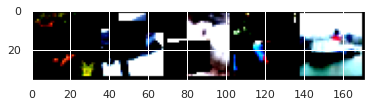

In [16]:
model.show_images(5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 deer  frog truck  bird  deer


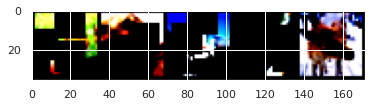

In [17]:
model.show_images(5)

In [18]:
model.run_epochs(20)


Epoch: 1



Test Set: Accuracy: 37.65 (3765/10000) | Average Loss: 1.70388

Epoch: 2



Test Set: Accuracy: 44.40 (4440/10000) | Average Loss: 1.57083

Epoch: 3



Test Set: Accuracy: 49.36 (4936/10000) | Average Loss: 1.41317

Epoch: 4



Test Set: Accuracy: 52.79 (5279/10000) | Average Loss: 1.32403

Epoch: 5



Test Set: Accuracy: 56.74 (5674/10000) | Average Loss: 1.22037

Epoch: 6



Test Set: Accuracy: 58.16 (5816/10000) | Average Loss: 1.18065

Epoch: 7



Test Set: Accuracy: 59.93 (5993/10000) | Average Loss: 1.13215

Epoch: 8



Test Set: Accuracy: 60.60 (6060/10000) | Average Loss: 1.11180

Epoch: 9



Test Set: Accuracy: 62.30 (6230/10000) | Average Loss: 1.07744

Epoch: 10



Test Set: Accuracy: 64.06 (6406/10000) | Average Loss: 1.01862

Epoch: 11



Test Set: Accuracy: 63.66 (6366/10000) | Average Loss: 1.02400

Epoch: 12



Test Set: Accuracy: 65.41 (6541/10000) | Average Loss: 0.98766

Epoch: 13



Test Set: Accuracy: 65.63 (6563/10000) | Average Loss: 0.96916

Epoch: 14



Test Set: Accuracy: 65.09 (6509/10000) | Average Loss: 1.00776

Epoch: 15



Test Set: Accuracy: 66.58 (6658/10000) | Average Loss: 0.95072

Epoch: 16



Test Set: Accuracy: 68.21 (6821/10000) | Average Loss: 0.91137

Epoch: 17



Test Set: Accuracy: 66.34 (6634/10000) | Average Loss: 0.95766

Epoch: 18



Test Set: Accuracy: 67.83 (6783/10000) | Average Loss: 0.93002

Epoch: 19



Test Set: Accuracy: 68.39 (6839/10000) | Average Loss: 0.91964

Epoch: 20



Test Set: Accuracy: 68.39 (6839/10000) | Average Loss: 0.92518


In [19]:
model.run_epochs(10)


Epoch: 1



Test Set: Accuracy: 67.90 (6790/10000) | Average Loss: 0.93912

Epoch: 2



Test Set: Accuracy: 69.09 (6909/10000) | Average Loss: 0.88758

Epoch: 3



Test Set: Accuracy: 69.78 (6978/10000) | Average Loss: 0.88535

Epoch: 4



Test Set: Accuracy: 71.35 (7135/10000) | Average Loss: 0.83754

Epoch: 5



Test Set: Accuracy: 70.01 (7001/10000) | Average Loss: 0.87034

Epoch: 6



Test Set: Accuracy: 70.06 (7006/10000) | Average Loss: 0.88511

Epoch: 7



Test Set: Accuracy: 70.91 (7091/10000) | Average Loss: 0.86594

Epoch: 8



Test Set: Accuracy: 71.93 (7193/10000) | Average Loss: 0.84992

Epoch: 9



Test Set: Accuracy: 72.08 (7208/10000) | Average Loss: 0.83855

Epoch: 10



Test Set: Accuracy: 72.61 (7261/10000) | Average Loss: 0.82906


In [0]:
# train_loader, test_loader = DataLoader.get_cifar10(batch_size=256, seed=18, augmentations= album_compose)
# criterion = nn.CrossEntropyLoss()
# optimizer2 = optim.SGD(ResNet18.parameters(), lr=0.03, momentum=0.9)
# scheduler2 = StepLR(optimizer2, step_size=5, gamma=0.1)
# model2 = Learner(ResNet18, train_loader, test_loader, criterion, optimizer2)

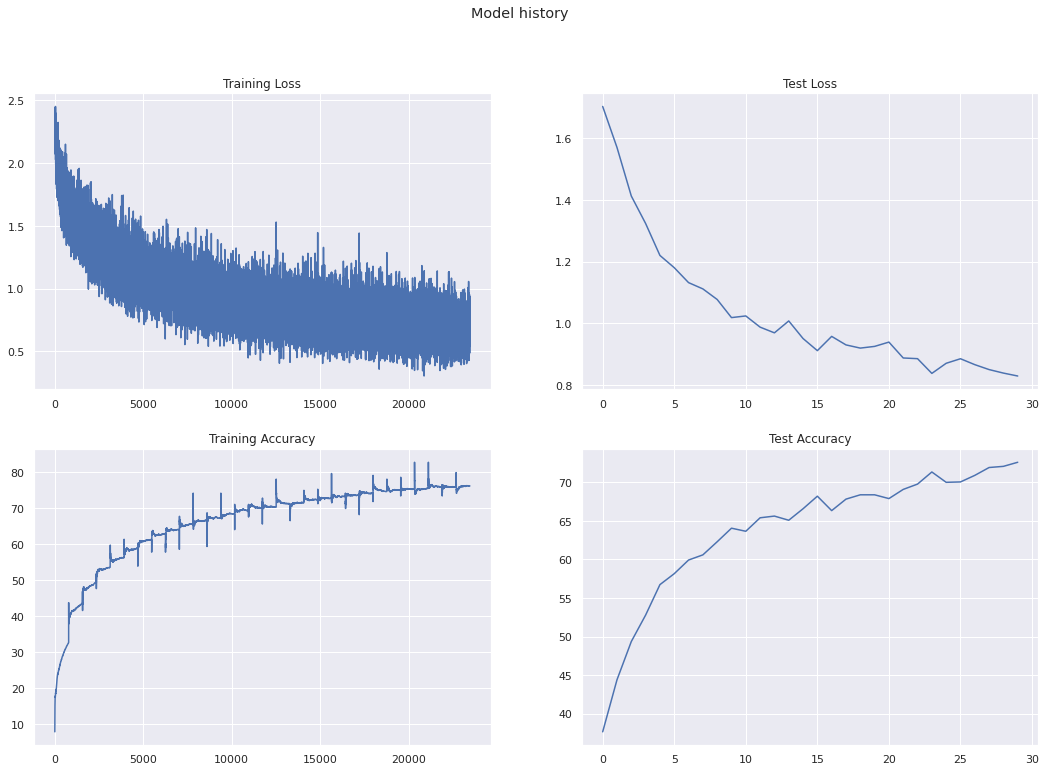

In [23]:
model.show_history()

In [24]:
model.classwise_accuracy()

Accuracy of plane      : 65.45%
Accuracy of car        : 85.14%
Accuracy of bird       : 51.61%
Accuracy of cat        : 55.93%
Accuracy of deer       : 72.31%
Accuracy of dog        : 59.32%
Accuracy of frog       : 72.41%
Accuracy of horse      : 71.01%
Accuracy of ship       : 86.67%
Accuracy of truck      : 76.12%


Code taken from [gradcam](https://github.com/abhinavdayal/EVA4/edit/master/S9/EVA4/eva4gradcam.py), modified for my wrapper api 


In [0]:
import cv2
import urllib
import numpy as np
from google.colab.patches import cv2_imshow

def getimage(img, transform, input_size=(32,32)):
  if img.startswith("http"):
      req = urllib.request.urlopen(img)
      arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
      img = cv2.imdecode(arr, -1) # 'Load it as it is'
  else:
    img = cv2.imread(img, 1)
  
  img = img[:,:, -1::-1]
  
  img = np.uint8(cv2.resize(img, input_size))

  return transform(img)

#
links = [ 'https://images.unsplash.com/photo-1559711469-31b420b24c10', 
'https://images.unsplash.com/photo-1532974297617-c0f05fe48bff', 
'https://images.unsplash.com/photo-1507477338202-487281e6c27e', 
'https://images.unsplash.com/photo-1519052537078-e6302a4968d4', 
'https://images.unsplash.com/photo-1542890886-40c9094e352a', 
'https://images.unsplash.com/photo-1548199973-03cce0bbc87b',
'https://images.unsplash.com/photo-1547845172-50a457530eaf', 
'https://images.unsplash.com/photo-1547581849-38ba650ad0de', 
'https://images.unsplash.com/photo-1500687834377-1388ec3c5991', 
'https://images.unsplash.com/photo-1519003722824-194d4455a60c'
]

target_classes = [0,1,2,3,4,5,6,7,8,9]

test_transforms = transforms.Compose([
            transforms.ToTensor(), 
            transforms.Normalize(DataLoader.cifar10_mean, DataLoader.cifar10_std)
            ])
images = [getimage(url, test_transforms) for url in links]


torch.Size([10, 10])
Generating Grad-CAM @layer1
Generating Grad-CAM @layer2
Generating Grad-CAM @layer3
Generating Grad-CAM @layer4


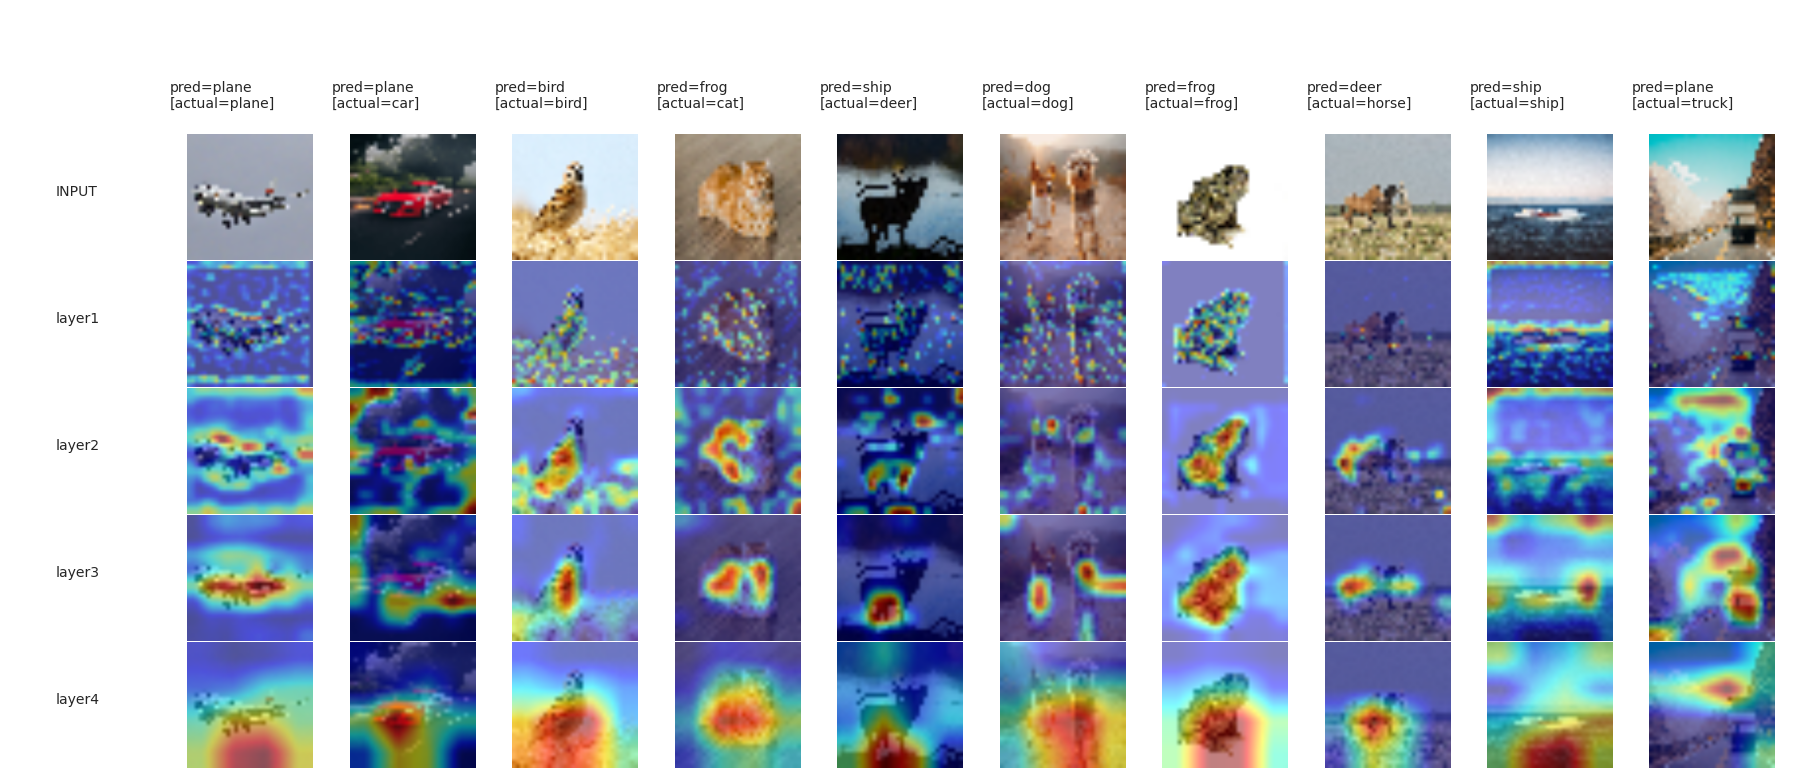

In [28]:
from engine.gradcam import GRADCAM, PLOT
target_layers = ["layer1", "layer2", "layer3", "layer4"]
gradcam_output, probs, predicted_classes = GRADCAM(images, target_classes, model, target_layers)
PLOT(gradcam_output, images, target_classes, target_layers, DataLoader.cifar10_classes, (3, 32, 32), predicted_classes)